# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [23]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

(130, 3)

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

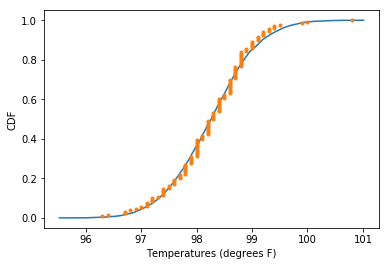

In [22]:
#1:  Is the distribution of body temperatures normal?

# Let's explore this visually by comparing the sample ecdf to the normal ecdf.

temp_list = df.temperature.tolist()

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,  n +1) / n

    return x, y


# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_list)
sigma = np.std(temp_list)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y, = ecdf(temp_list)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperatures (degrees F)')
_ = plt.ylabel('CDF')
plt.show()

In [31]:
#1 Continued:  Graphical results seem favorable, as the sample points (in orange) conform to the normal ecdf.

# Next, Bootstrap a Hypothesis test that the observed distribution is the same as the normal distribution.
# Recall that temp_list and samples were used in the last cell.  Let's redraw a smaller number of samples this time.
# Our Null Hypothesis will be that the two distributions are equal
# Our Null Hypothesis will be that the two distributions are not equal
# Our confidence level will be 95%

alpha = 0.05

#Define Drawing Bootstrap Replicates for general function
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


samples = np.random.normal(mu, sigma, size = 130)

# Compute the difference in mean temperature: diff_means
diff_means = np.mean(temp_list) - np.mean(samples)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((temp_list, samples)))

# Generate shifted data sets
temp_shifted = temp_list - np.mean(temp_list) + mean_count
samp_shifted = samples - np.mean(samples) + mean_count

# Generate bootstrap replicates
bs_reps_temp = draw_bs_reps(temp_shifted,
                       np.mean, size=10000)
bs_reps_samp = draw_bs_reps(samp_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_temp -  bs_reps_samp

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(temp_list) - np.mean(samples)) \
            / len(bs_replicates)
print('p value = ', p, ' and alpha = ', alpha)
if p >= alpha:
    print('We fail to reject the Null Hypothesis: Our study suggests the two distributions likely are equal.')
if p < alpha:
    print('We reject the Null Hypothesis:  Our study suggests the two distributions are not equal')

p value =  0.3463  and alpha =  0.05
We fail to reject the Null Hypothesis: Our study suggests the two distributions are equal.


In [ ]:
#1 Answer:  The distribution of Body Temperatures is likely Normally Distributed.

In [83]:

# Question 2:  Is the sample size large? Are the observations independent?

#Answer: 
#It is encourging that our sample contains 130 entries.  The Central Limit Theorem generally requires a 
#sample size of 30 or more to assume the distribution of an independent random variable is approximately normal.
#It should be a reasonable assumption that individual patients' body temperatures are independent.

In [87]:
# Question 3, Part 1) A bootstrap Hypothesis Test for the Mean:

# Null Hypothesis:  The true population mean temperature is 98.6
# Alternate Hypothesis:  The true population mean temperature is not 98.6
# alpha is still stored as 0.05

hypothetical_mean = 98.6

# Make an array of translated_data: 
translated_data_set = temp_list - np.mean(temp_list) + (hypothetical_mean)

# Take bootstrap replicates of translated data set: bs_replicates
bs_replicates = draw_bs_reps(translated_data_set, np.mean, 10000)

# Compute fraction of replicates that are less than the observed data set: p
p = np.sum(bs_replicates <= np.mean(temp_list)) / 10000

# Print the p-value
print('p = ', p)




p =  0.0


In [ ]:
# Question 3, Part 1 Answer:  The p value is likely too small to display.  
# Our analysis suggests it is likely that the true population temperature mean is 98.6 degrees F

In [ ]:
# Question 3, Part 2:  Would you use a one-sample or two-sample test? Why?
# Question 3, Part 3:  In this situation, is it appropriate to use the  t  or  z  statistic?
# Question 3, Part 4:  Now try using the other test. How is the result be different? Why?

# Question 3, Part 2 Answer:  A one sample test is appropriate, since we only have one sample set.  A two sample
# test would be appropriate if we were comparing two sets of data to see if their means were equal.

# Question 3, Part 3 Answer:  I would use a z statistic.  While the population standard deviation is unknown, 
# the sample size is larger than 30. By Central Limit Theorem, it should be acceptable to treat the distribution
# as approximately normal.  Thus, a z statistic will suffice.

# Question 3, Part 4:  Using the full data set and the stat calculator at https://www.socscistatistics.com/tests/
# T value = -5.454823, p < 0.00001
# Z value = -5.47593, p < 0.00001

# While both tests returned significant p values, T statistics are generally found inside Z statistics (closer to 0)  
# A Z statistic is calculated assuming you know the pop std dev (or are reasonably certain your sample is normal by CLT)
# because a Z Test has a higher degree of precision, it can be obtain smaller p values from the same data set
# because a T Test may not have an ideal std dev, it requires slightly more accumulated p values to draw the same 
# conclusion... thus a critical T value is calculated closer to 0 than a critical Z value

In [137]:
# Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.
# Which one is the correct one to use?
# What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

temp_by_10 = np.random.choice(temp_list, size=10)
mean_10 = np.mean(temp_by_10)
std_10 = np.std(temp_by_10)

print('10 count sample mean = ', mean_10, ', standard deviation = ', round(std_10,2), '.')

# T test result:  T = -0.199293. The value of p is .846464. The result is not significant at p < .05
# Z test result:  Z = -0.21007. The value of p is .83366. The result is not significant at p < .05.

# Here, it would be correct to use the T test statistic, since the sample now has size 10, and the
# population standard deviation is still unknown.  That being said, the smaller sample results were not 
# all that good!  It seems like a better choice to get a large bootstrap sample to study than to shrink the 
# sample size to 10% of the original!

10 count sample mean =  98.14000000000001 , standard deviation =  0.51 .


In [61]:
# Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

# Strictly speaking, the top and bottom 2.5% of the distribution are abnormal.
# Taken from the Bootstrap Replicates set, we have:

# Developing a Confidence Interval for Bootstrap Sample
# First, let's obtain one bootstrap Sample of the same size as the original data.

bs_dist = np.random.choice(temp_list, size = 130)

bs_mu = np.mean(bs_dist)
bs_sigma = np.std(bs_dist)

bs_high = np.round(bs_mu + 2*bs_sigma, 2)
bs_low = np.round(bs_mu - 2*bs_sigma, 2)

# frequentist approach:  Again, since this data is approximately normal, the standard deviation should be used to 
# make assertions about the spread and variability of the data.

freq_low = round(mu - 2*sigma, 3)
freq_high = round(mu + 2*sigma, 3)

print('Bootstrap abnormal high: ', bs_high, ' and up')
print('Bootstrap abnormal low: ', bs_low, ' and below')
print('')
print('frequentist abnormal high: ', freq_high, ' and up')
print('frequentist abnormal low: ', freq_low, ' and below')


Bootstrap abnormal high:  99.81  and up
Bootstrap abnormal low:  96.52  and below

frequentist abnormal high:  99.71  and up
frequentist abnormal low:  96.789  and below


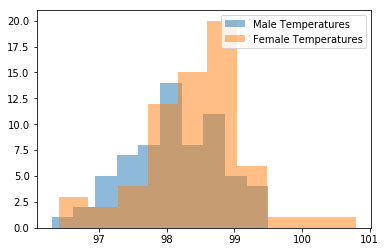

Sample: Mean Male Temperature =  98.105  with standard deviation =  0.693
Sample: Mean Female Temperature =  98.394  with standard deviation =  0.738


In [101]:
# Question 6: Is there a significant difference between males and females in normal temperature?

M_temps = df[df['gender'] == 'M'].temperature.tolist()
F_temps = df[df['gender'] == 'F'].temperature.tolist()

M_mean = np.mean(M_temps)
M_sigma = np.std(M_temps)

F_mean = np.mean(F_temps)
F_sigma = np.std(F_temps)

# We are essentially trying to determine if the two distributions are the same.  
# let's start with a visual exploration.

plt.hist(M_temps, alpha=0.5, label='Male Temperatures')
plt.hist(F_temps, alpha=0.5, label='Female Temperatures')
plt.legend(loc='upper right')
plt.show()

print('Sample: Mean Male Temperature = ', round(M_mean, 3), ' with standard deviation = ', round(M_sigma, 3)) 
print('Sample: Mean Female Temperature = ', round(F_mean, 3), ' with standard deviation = ', round(F_sigma, 3)) 

In [182]:
# Question 6 Continued: Is there a significant difference between males and females in normal temperature?

# That is, are the upper and lower bounds on what is considered normal (within 2 standard deviations) the same?
# To answer this question, let's generate a distribution of resampled normal ranges from the Male and Female observed 
# temperatures, and compare them to a permuted resampling of the same data.

# Generate samples of normal ranges for both males and females.

female_lows = []
female_highs = []

male_lows = []
male_highs = []

for i in range(10000):
    male_sample = np.random.choice(M_temps, size=len(M_temps))

    male_low = np.percentile(male_sample, 2.5)
    male_high = np.percentile(male_sample, 97.5)
    male_lows = np.append(male_lows, male_low)
    male_highs = np.append(male_highs, male_high)

    female_sample = np.random.choice(F_temps, size = len(F_temps))

    female_low = np.percentile(female_sample, 2.5)
    female_high = np.percentile(female_sample, 97.5)
    female_lows = np.append(female_lows, female_low)
    female_highs = np.append(female_highs, female_high)


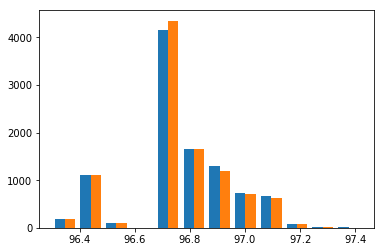

In [197]:
# Let's compare the lows visually

plt.hist([male_lows, female_lows], bins = 12)

plt.show()


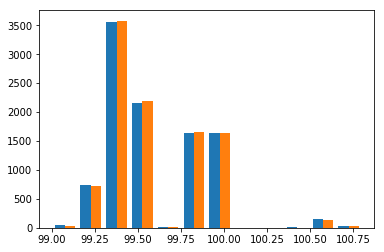

In [195]:
plt.hist([male_highs, female_highs], bins = 12)
plt.show()


In [ ]:
# Given the above visual comparison, is would be very surprising that the ranges are significantly different.
# It should not be necessary to conduct a full hypothesis test.  If there is a signiciant different in normal range
# The data that was collected in the study will not be sufficient to detect it.
